<a href="https://colab.research.google.com/github/Prashanth-K-Narasimhan/DataScience-Workspace/blob/main/group317_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Credit Card Fraud Detection
### Anonymized credit card transactions labeled as fraudulent or genuine


---


##### **About this Dataset :**
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

##### **Citation**: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015 *italicized text*

Read the file from input.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install kaggle
# %cd '/content/drive/MyDrive/bits_pilani/group317-creditcard'
# # !kaggle kernels pull code/lovedeepsaini/fraud-detection-with-naive-bayes-classifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive/bits_pilani/group317-creditcard


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/bits_pilani/group317-creditcard/"

In [ ]:
# !pwd

/content/drive/MyDrive/bits_pilani/group317-creditcard


In [ ]:
import pandas as pd

# Data Handling: Load CSV
df =pd.read_csv('https://media.githubusercontent.com/media/Prashanth-K-Narasimhan/DataScience-Workspace/d7e597643264c799b7af8a29bc3a8fe6910fafdd/creditcard.csv?token=AGJJJIV5JNZ2NE6DEKQ3EVDCWNQJI')
# df = pd.read_csv("creditcard.csv")

print(df.shape)

(284807, 31)




1.   Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [ ]:
with pd.option_context("display.max_columns", 31):
    display(df.head(2))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0




2.   Comment on class imbalance with appropriate visualization method.

> Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.





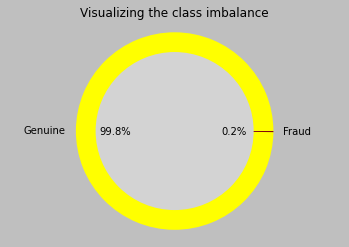

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('grayscale')

fig, ax = plt.subplots()

class_count = df.Class.value_counts()

# colors
colors = ['yellow', 'maroon']

# Pie Chart
plt.pie(class_count, colors=colors, labels=['Genuine','Fraud'],
        autopct='%1.1f%%', pctdistance=0.60)

plt.axis('equal')
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.8, fc='lightgray')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Visualizing the class imbalance')
  
# Displaying Chart
plt.show()


In [ ]:
#plot Time to see if there is any trend
# print("Time variable")
# df["Time_Hr"] = (df["Time"]/3600).apply(np.ceil) # convert to hours
# print(df["Time_Hr"].tail(5))


Time variable
284802    48.0
284803    48.0
284804    48.0
284805    48.0
284806    48.0
Name: Time_Hr, dtype: float64


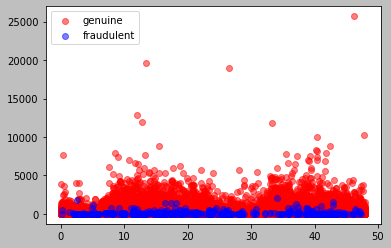

In [ ]:
# Fixing random state for reproducibility

df["Time_Hr"] = (df["Time"]/3600) # convert to hours

fig, ax = plt.subplots()

# genuine : class = 0
x = df.Time_Hr[df.Class==0]
y = df.Amount[df.Class==0]

# fraud : class = 1
a = df.Time_Hr[df.Class==1]
b = df.Amount[df.Class==1]

gen = ax.scatter(x, y, alpha=0.5, color="r")
fra = ax.scatter(a, b, alpha=0.5, color="b")

ax.legend(handles=[gen, fra], labels=["genuine", "fraudulent"])

# ax.show()

StandardScaler ???

In [ ]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaler'] = df['Amount'] / df['scaled_Amount']
# df = df.drop(['Amount'],axis=1)
display(df[["Amount", "scaled_Amount", "scaler"]])

,Amount,scaled_Amount,scaler
0,149.62,0.244964,610.782969
1,2.69,-0.342475,-7.854598
2,378.66,1.160686,326.238125
3,123.50,0.140534,878.789322
4,69.99,-0.073403,-953.498843
...,...,...,...
284802,0.77,-0.350151,-2.199052
284803,24.79,-0.254117,-97.553552
284804,67.88,-0.081839,-829.430338
284805,10.00,-0.313249,-31.923534
